# Explorarea Datelor (Exploratory Data Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart_test_df = pd.read_csv("heart_4_test.csv")
heart_train_df = pd.read_csv("heart_4_train.csv")
heart_df = pd.concat([heart_test_df, heart_train_df], ignore_index=True)

pirvision_test_df = pd.read_csv("pirvision_office_test.csv")
pirvision_train_df = pd.read_csv("pirvision_office_train.csv")
pirvision_df = pd.concat([pirvision_test_df, pirvision_train_df], ignore_index=True)

## 1. Analiza tipului de atribute și a plajei de valori a acestora

In [2]:
heart_numerical = heart_df.select_dtypes(include=['float64', 'int64'])
heart_statistics = heart_numerical.describe(percentiles=[.25, .5, .75]).T
heart_statistics['non_missing'] = heart_numerical.notnull().sum()
heart_statistics = heart_statistics[['non_missing', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
heart_statistics

,non_missing,mean,std,min,25%,50%,75%,max
blood_pressure_medication,4196,0.029552,0.169368,0.000000,0.000000,0.000000,0.000000,1.000000
cholesterol_level,3878,236.618222,43.481077,107.000000,207.000000,235.000000,262.000000,600.000000
stroke_history,4240,0.005896,0.076569,0.000000,0.000000,0.000000,0.000000,1.000000
systolic_pressure,4240,132.354599,22.033300,83.500000,117.000000,128.000000,144.000000,295.000000
hypertension_history,4240,0.310613,0.462799,0.000000,0.000000,0.000000,1.000000,1.000000
daily_cigarettes,4217,9.005856,11.913975,0.000000,0.000000,0.000000,20.000000,70.000000
diastolic_pressure,4240,82.897759,11.910394,48.000000,75.000000,82.000000,90.000000,142.500000
heart_rate,4239,75.878981,12.025348,44.000000,68.000000,75.000000,83.000000,143.000000
smoking_status,3901,0.507049,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
diabetes_history,4240,0.025708,0.158280,0.000000,0.000000,0.000000,0.000000,1.000000


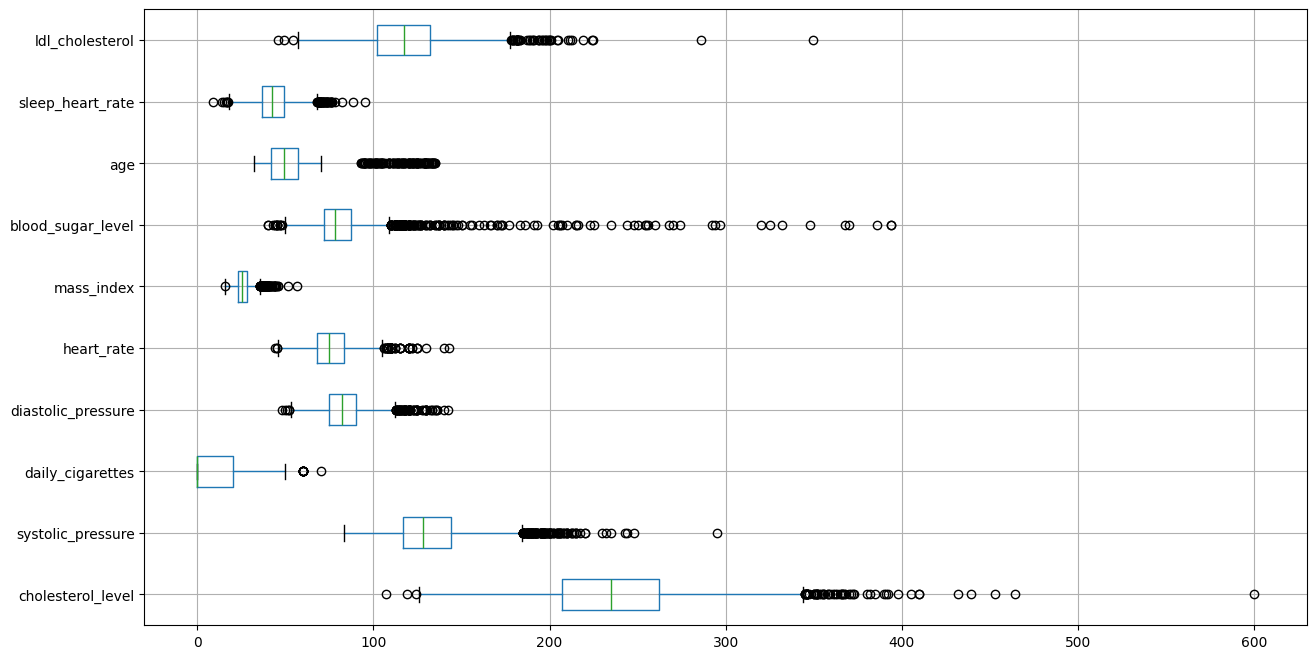

In [3]:
heart_continuous_columns = ['cholesterol_level', 'systolic_pressure', 'daily_cigarettes', 'diastolic_pressure', 'heart_rate', 'mass_index', 'blood_sugar_level', 'age', 'sleep_heart_rate', 'ldl_cholesterol']
heart_continuous_df = heart_df[heart_continuous_columns]
heart_continuous_df.boxplot(vert=False, figsize=(15, 8))
plt.show()

In [4]:
pirvision_numerical = pirvision_df.select_dtypes(include=['float64', 'int64'])
pirvision_statistics = pirvision_numerical.describe(percentiles=[.25, .5, .75]).T
pirvision_statistics['non_missing'] = pirvision_numerical.notnull().sum()
pirvision_statistics = pirvision_statistics[['non_missing', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
pirvision_statistics

,non_missing,mean,std,min,25%,50%,75%,max
Day Index,10000,2.005500,5.243064e-01,1.0,2.0,2.0,2.00,3.0
Temp (F),10000,80.392600,2.285846e+01,0.0,86.0,86.0,88.00,89.0
Temp (C),10000,26.698500,1.242325e+01,-17.0,30.0,30.0,31.00,31.0
OBS_1,9000,293891.306111,4.662186e+06,2613.0,10335.0,10433.0,10564.25,111602625.0
OBS_2,10000,10962.186600,1.363588e+03,2092.0,10779.0,11001.0,11281.00,16928.0
...,...,...,...,...,...,...,...,...
OBS_54,10000,10585.935000,4.532825e+02,2603.0,10514.0,10596.0,10684.00,16383.0
OBS_55,10000,10449.015700,4.379376e+02,2602.0,10388.0,10453.0,10523.00,16383.0
OBS_56,10000,11014.590200,4.807371e+02,2547.0,10929.0,11026.0,11129.00,17157.0
OBS_57,10000,10026.850500,4.205693e+02,2530.0,9957.0,10033.0,10109.00,15713.0


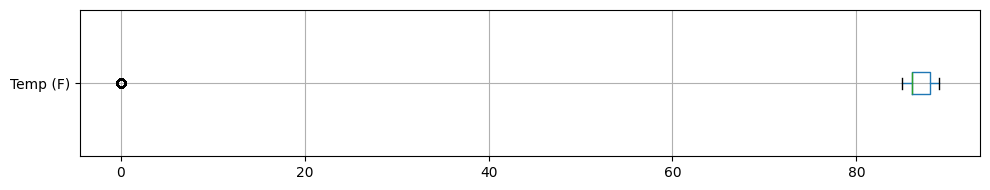

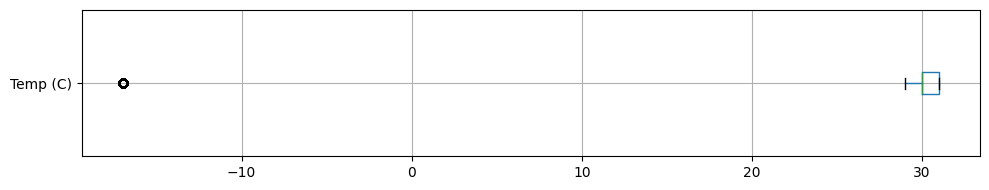

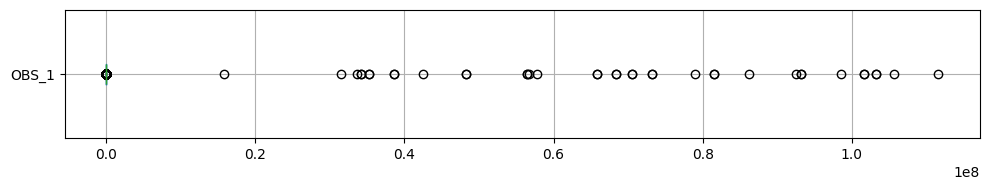

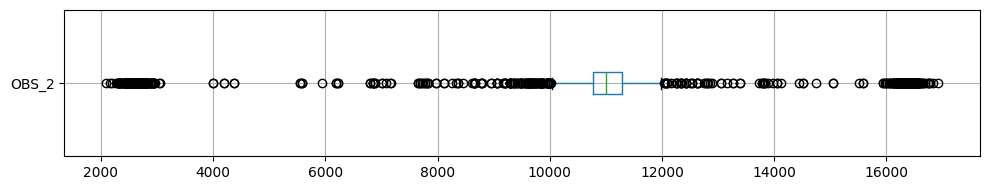

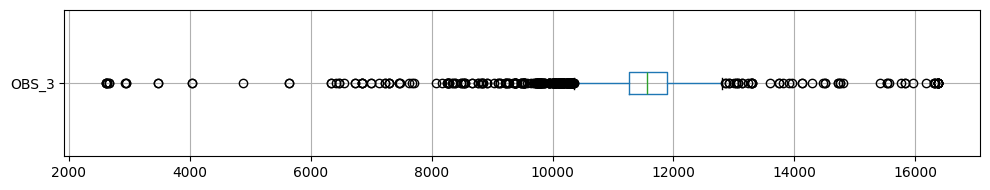

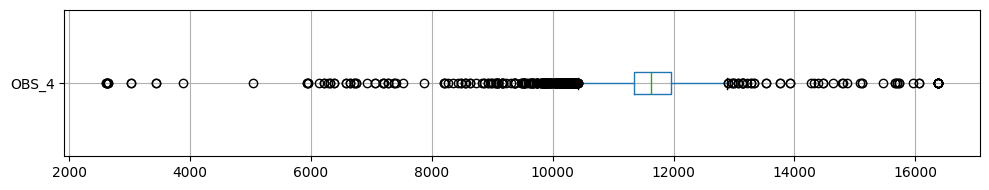

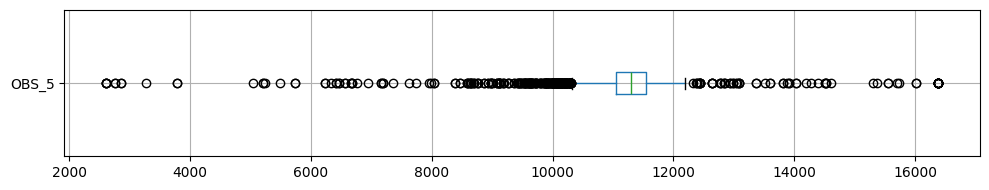

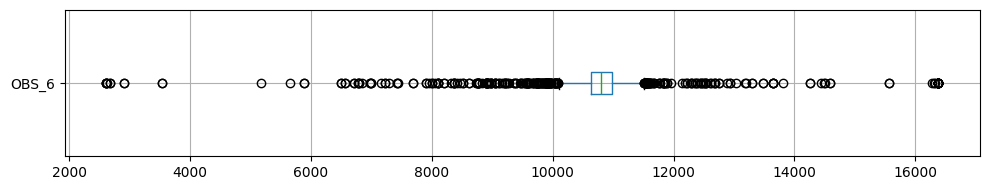

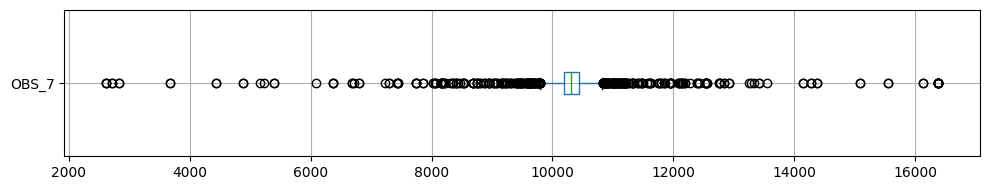

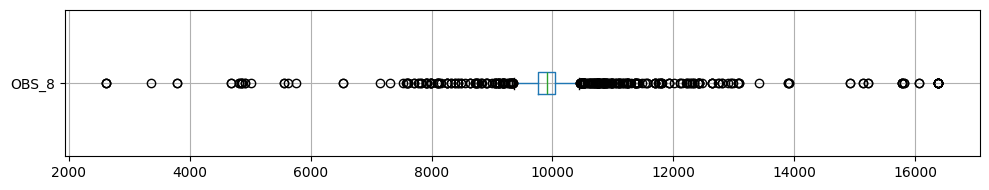

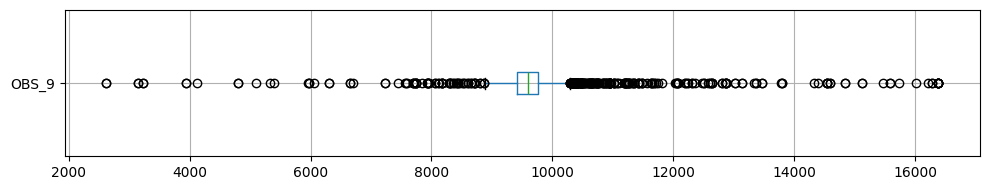

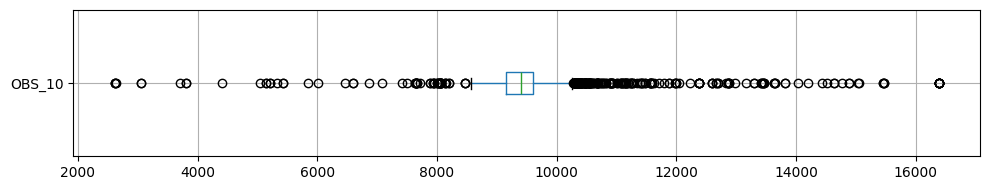

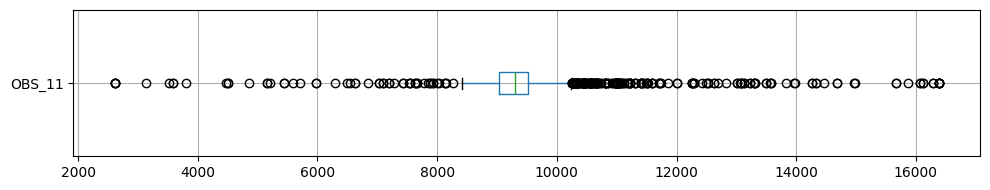

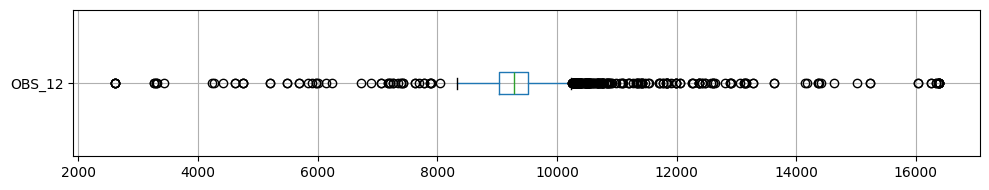

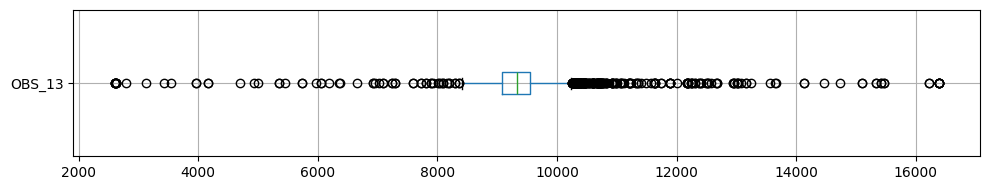

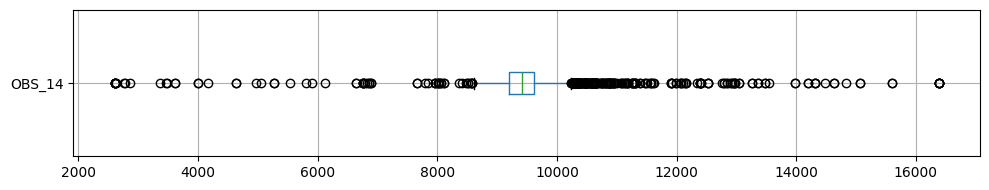

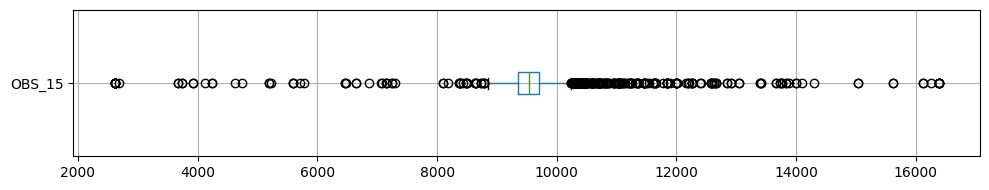

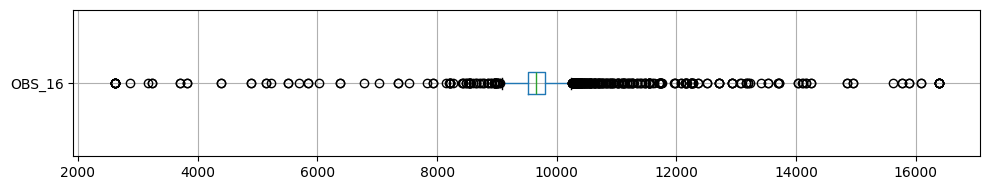

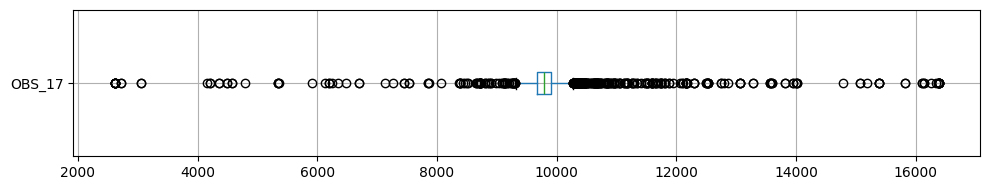

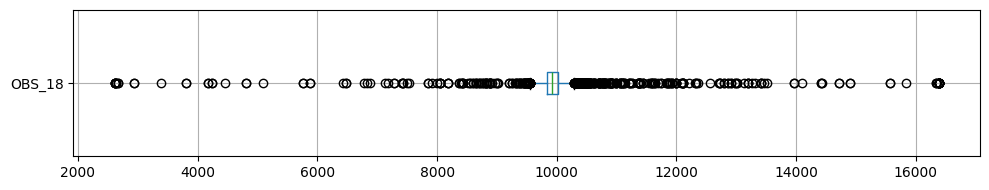

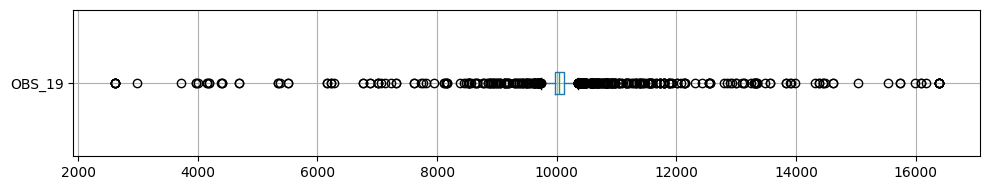

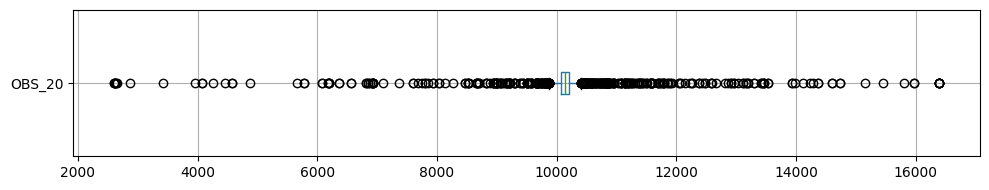

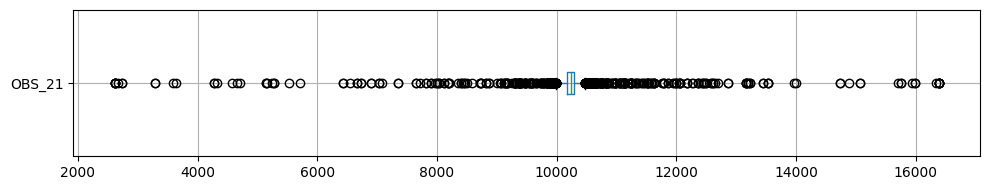

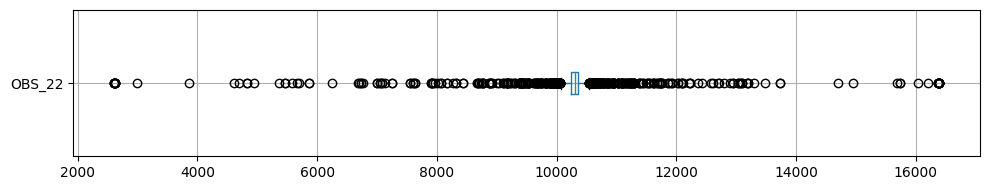

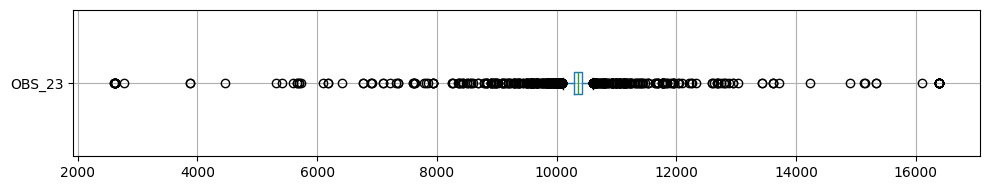

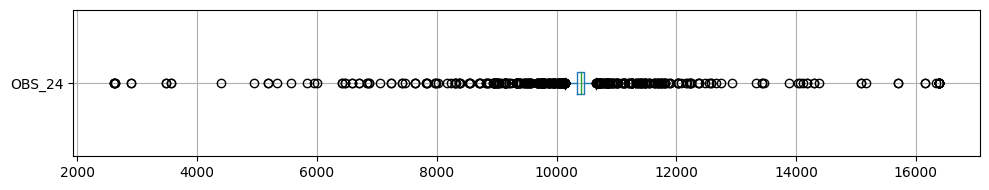

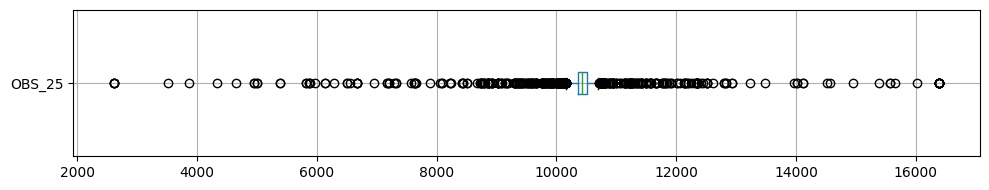

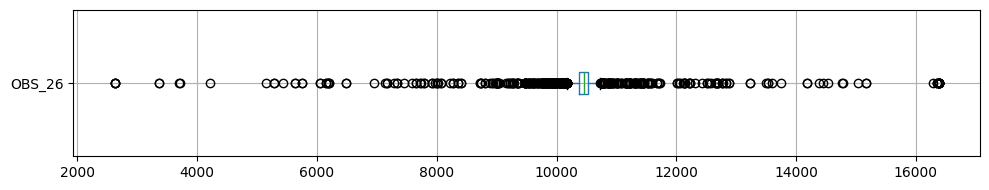

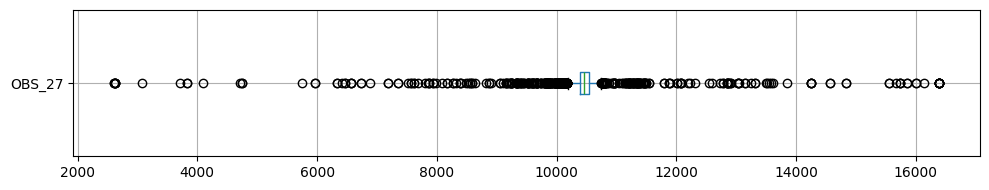

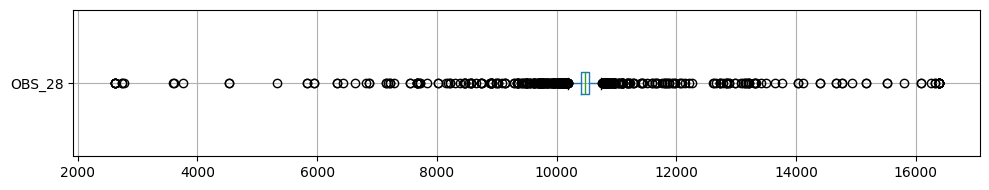

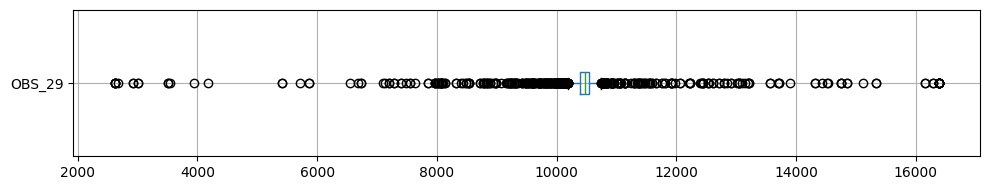

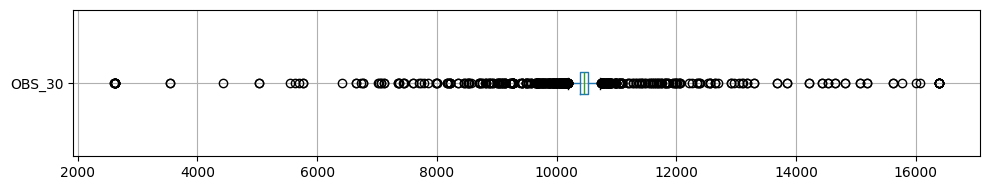

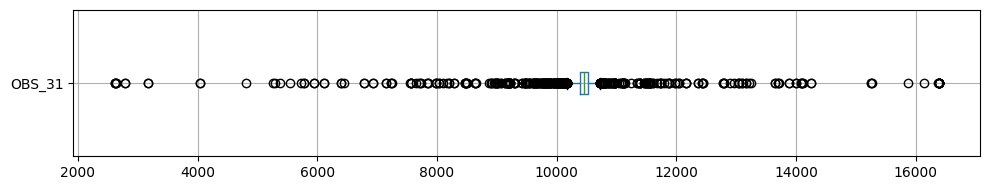

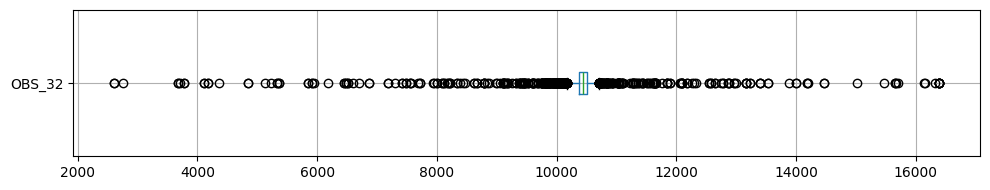

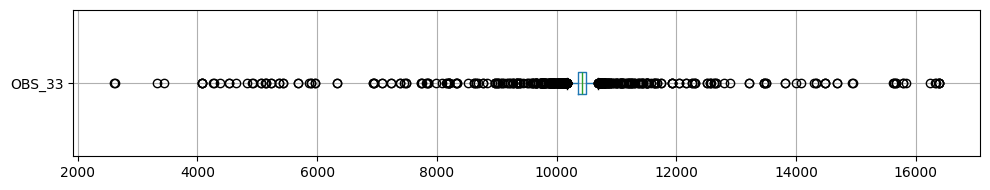

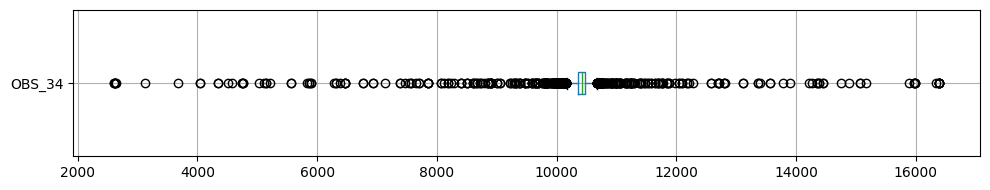

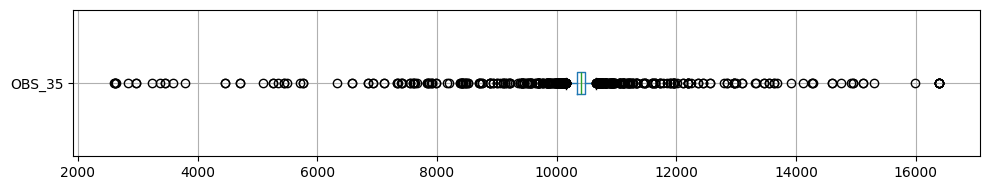

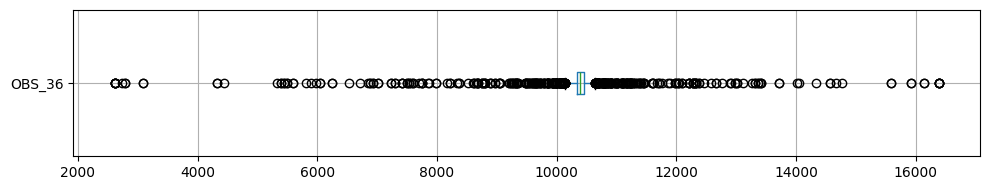

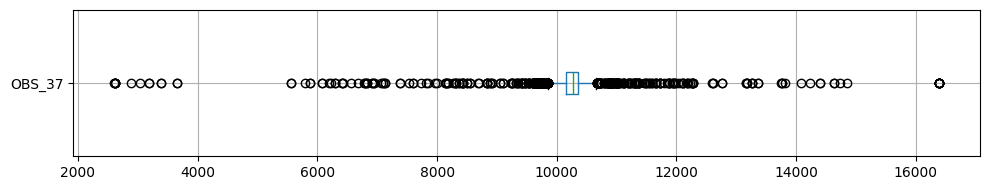

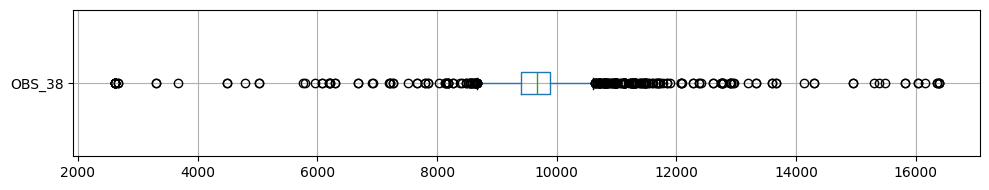

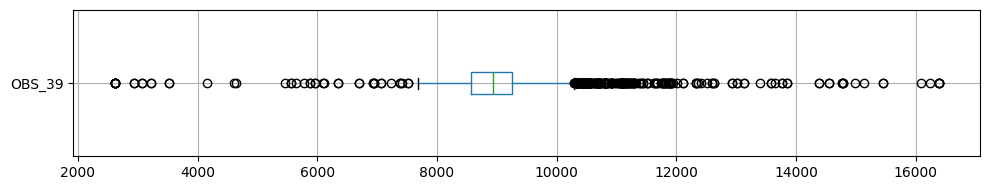

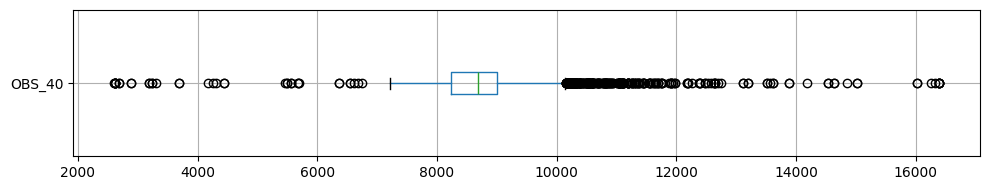

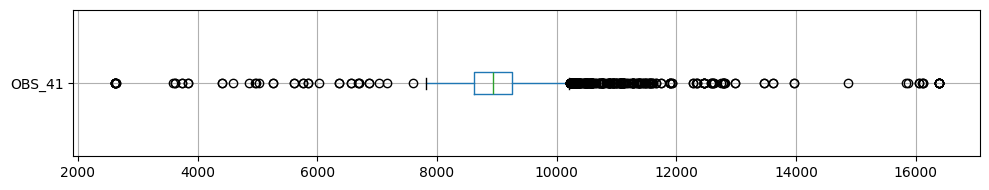

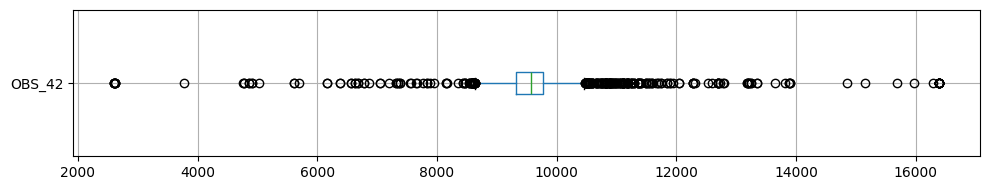

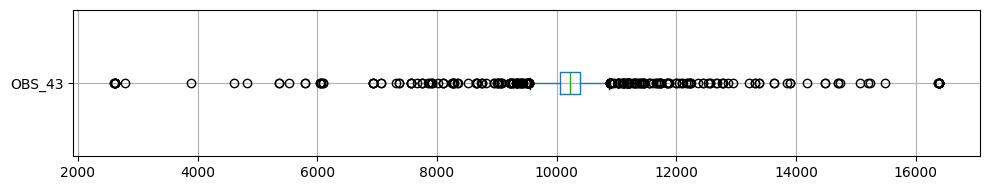

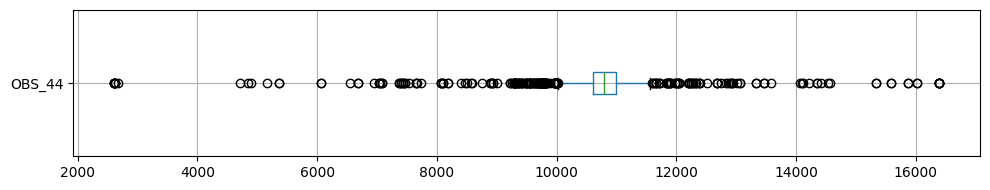

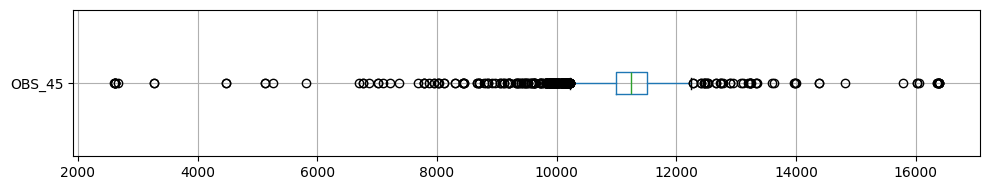

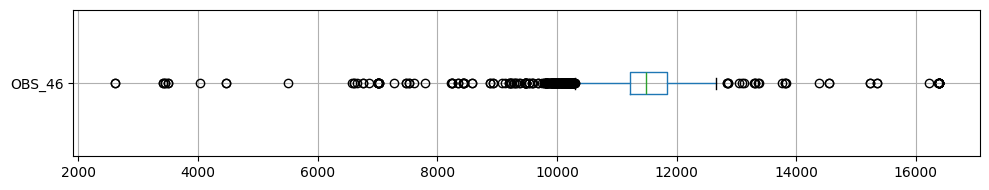

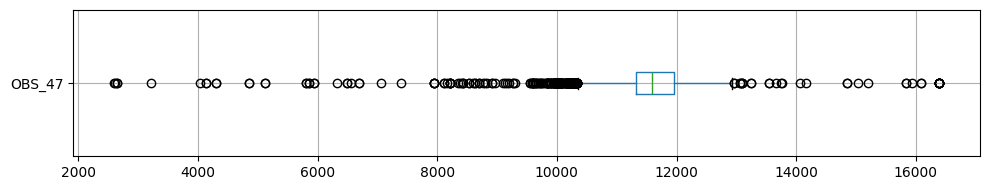

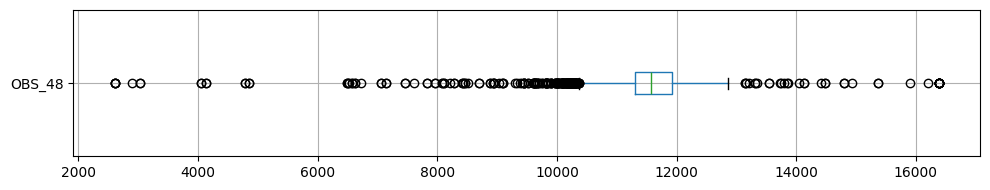

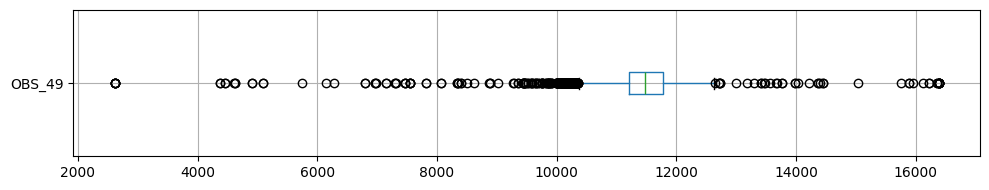

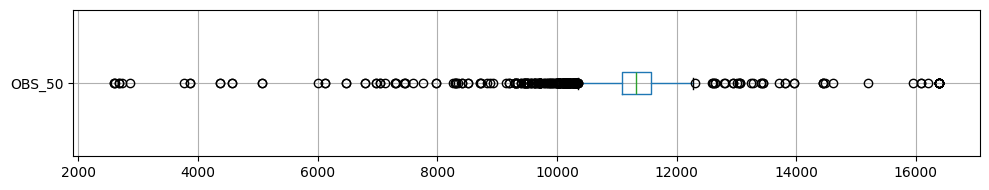

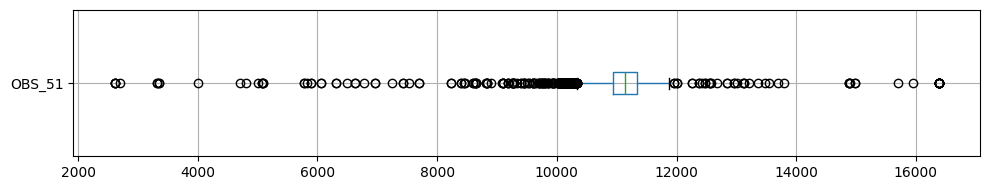

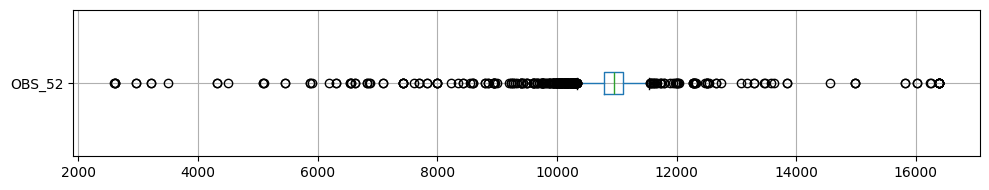

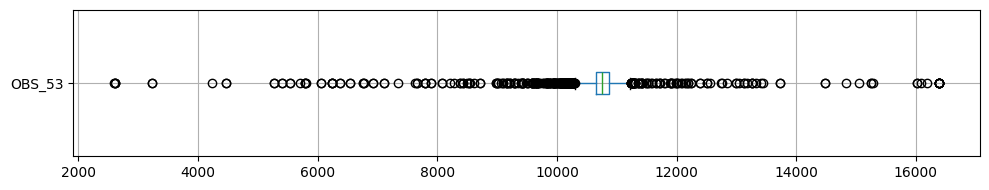

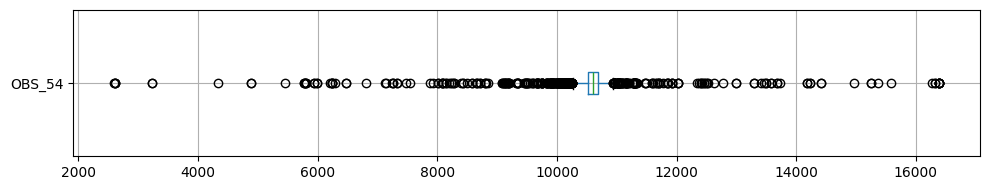

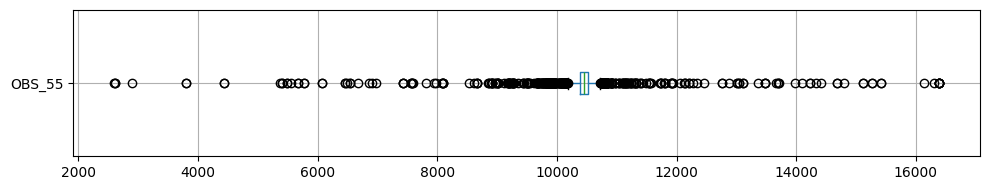

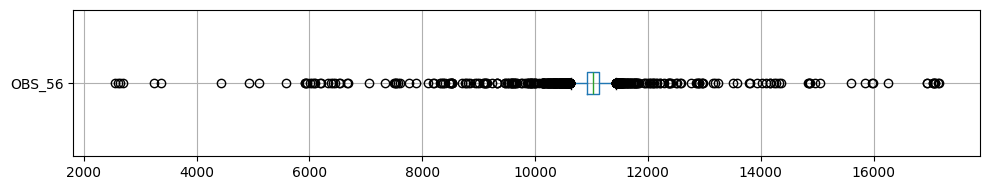

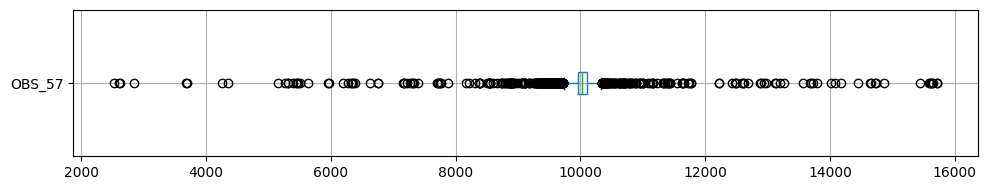

In [5]:
pirvision_continuous_columns = ['Temp (F)', 'Temp (C)']
pirvision_continuous_columns += ['OBS_' + str(i) for i in range(1, 58)]

for col in pirvision_continuous_columns:
    fig, ax = plt.subplots(figsize=(10, 2))
    pirvision_df[[col]].boxplot(vert=False, ax=ax)
    plt.tight_layout()
    plt.show()

In [6]:
heart_categorical_columns = heart_df.columns.difference(heart_continuous_df.columns)
heart_categorical = heart_df[heart_categorical_columns].copy()

non_missing = heart_categorical.notnull().sum()
unique = heart_categorical.nunique()

categorical_df = pd.DataFrame({
    'non_missing': non_missing,
    'unique': unique
})

categorical_df

,non_missing,unique
blood_pressure_medication,4196,2
chd_risk,4240,2
diabetes_history,4240,2
education_level,4158,4
gender,4240,2
high_blood_sugar,4240,2
hypertension_history,4240,2
smoking_status,3901,2
stroke_history,4240,2


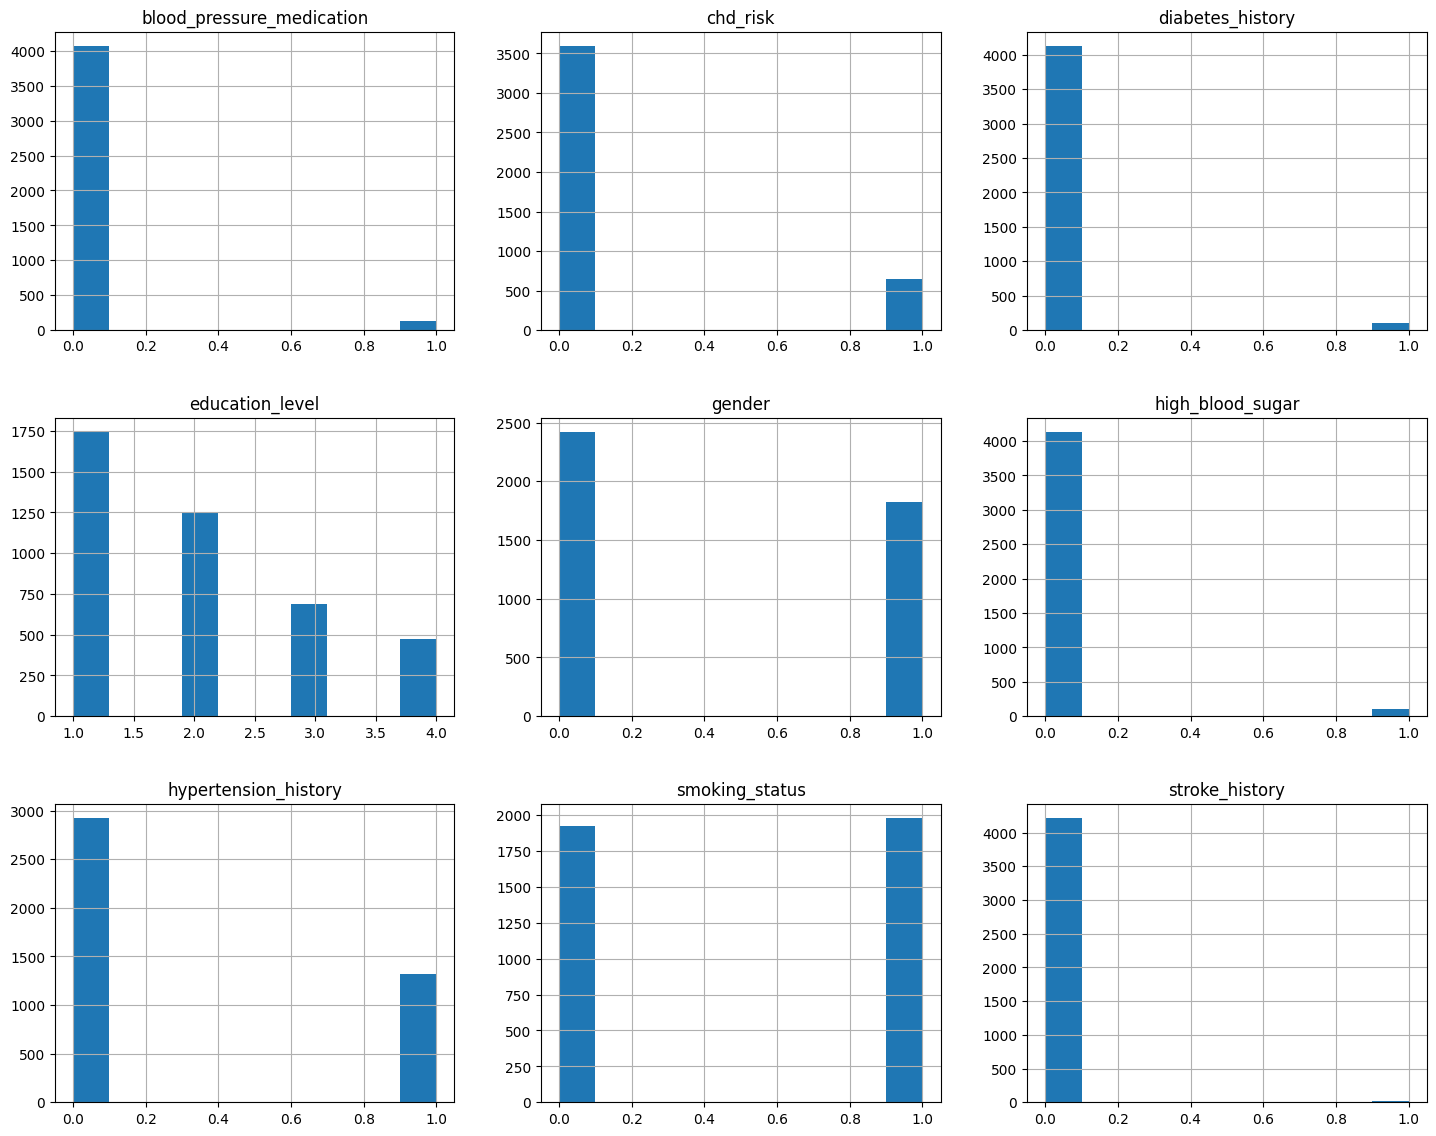

In [7]:
heart_categorical.hist(figsize=(15, 12))
plt.tight_layout(pad=3.0)
plt.show()

In [8]:
pirvision_categorical_columns = pirvision_df.columns.difference(pirvision_continuous_columns)
pirvision_categorical = pirvision_df[pirvision_categorical_columns].copy()

non_missing = pirvision_categorical.notnull().sum()
unique = pirvision_categorical.nunique()

categorical_df = pd.DataFrame({
    'non_missing': non_missing,
    'unique': unique
})

categorical_df

,non_missing,unique
Class,10000,3
Day,9000,3
Day Index,10000,3
Timestamp,9000,5502


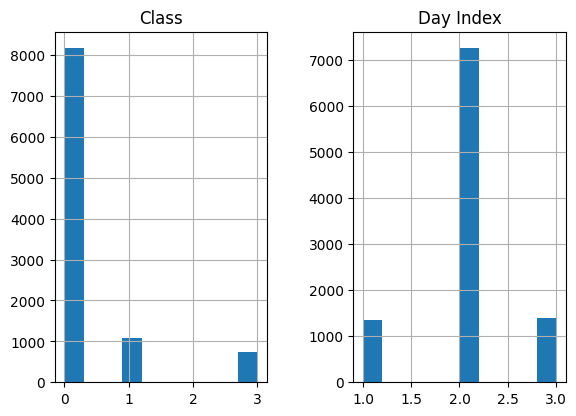

In [9]:
pirvision_categorical.hist()
plt.tight_layout(pad=3.0)
plt.show()

## 2. Analiza echilibrului de clase

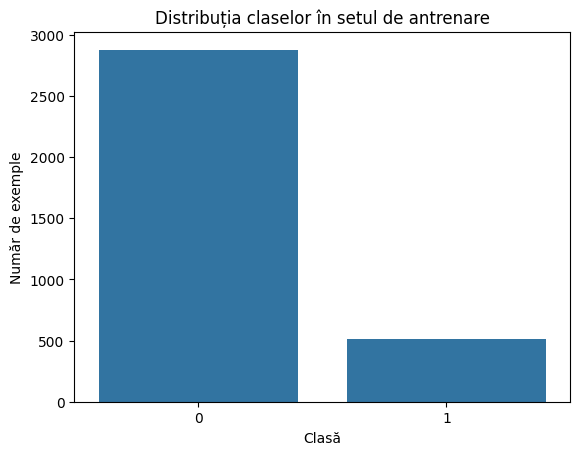

In [10]:
sns.countplot(data=heart_train_df, x='chd_risk')
plt.title('Distribuția claselor în setul de antrenare')
plt.xlabel('Clasă')
plt.ylabel('Număr de exemple')
plt.show()

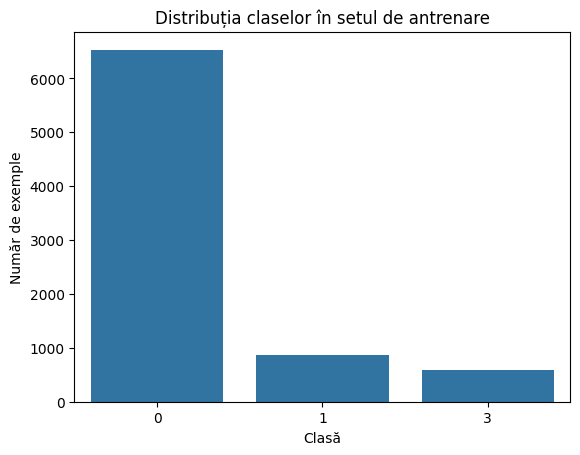

In [11]:
sns.countplot(data=pirvision_train_df, x='Class')
plt.title('Distribuția claselor în setul de antrenare')
plt.xlabel('Clasă')
plt.ylabel('Număr de exemple')
plt.show()

## 3. Analiza corelației între atribute

### Atribute numerice

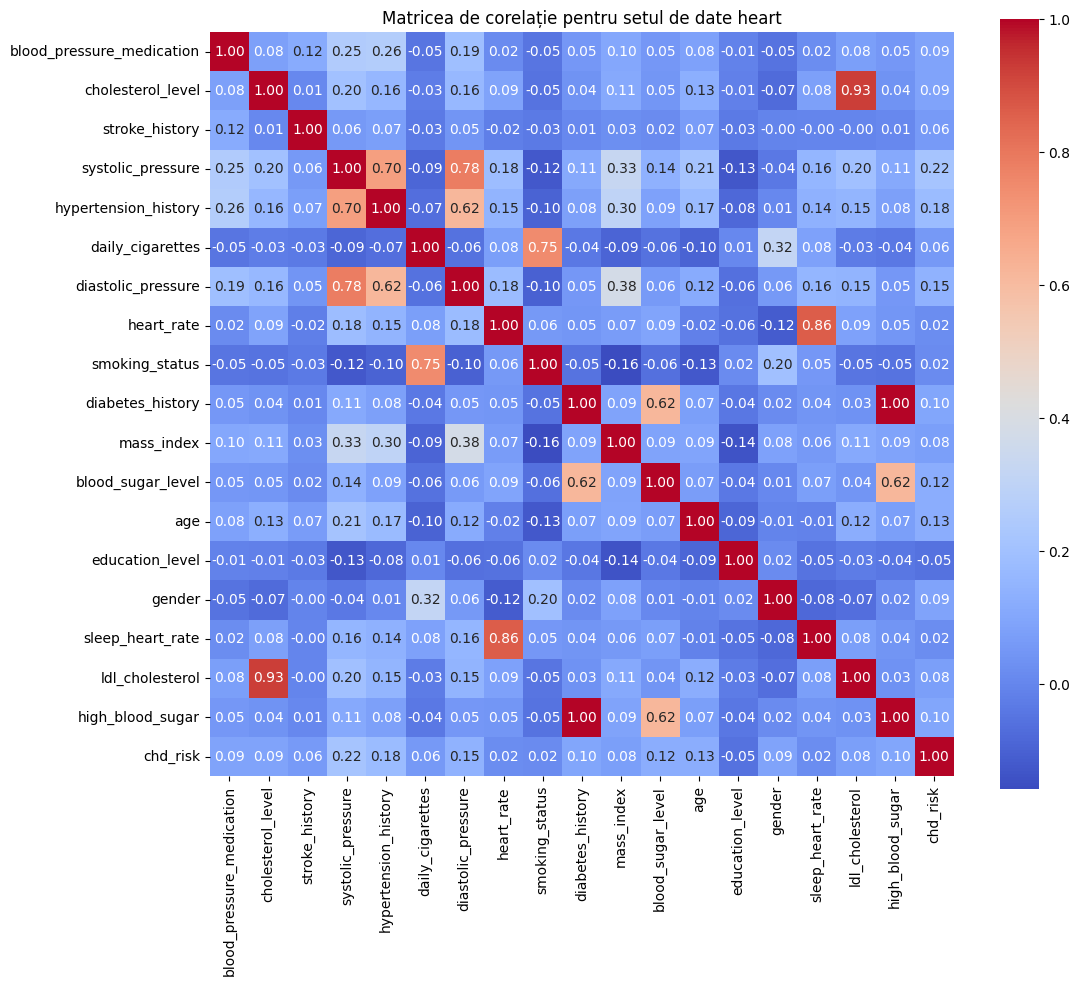

In [12]:
cor_matrix = heart_numerical.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matricea de corelație pentru setul de date heart")
plt.show()

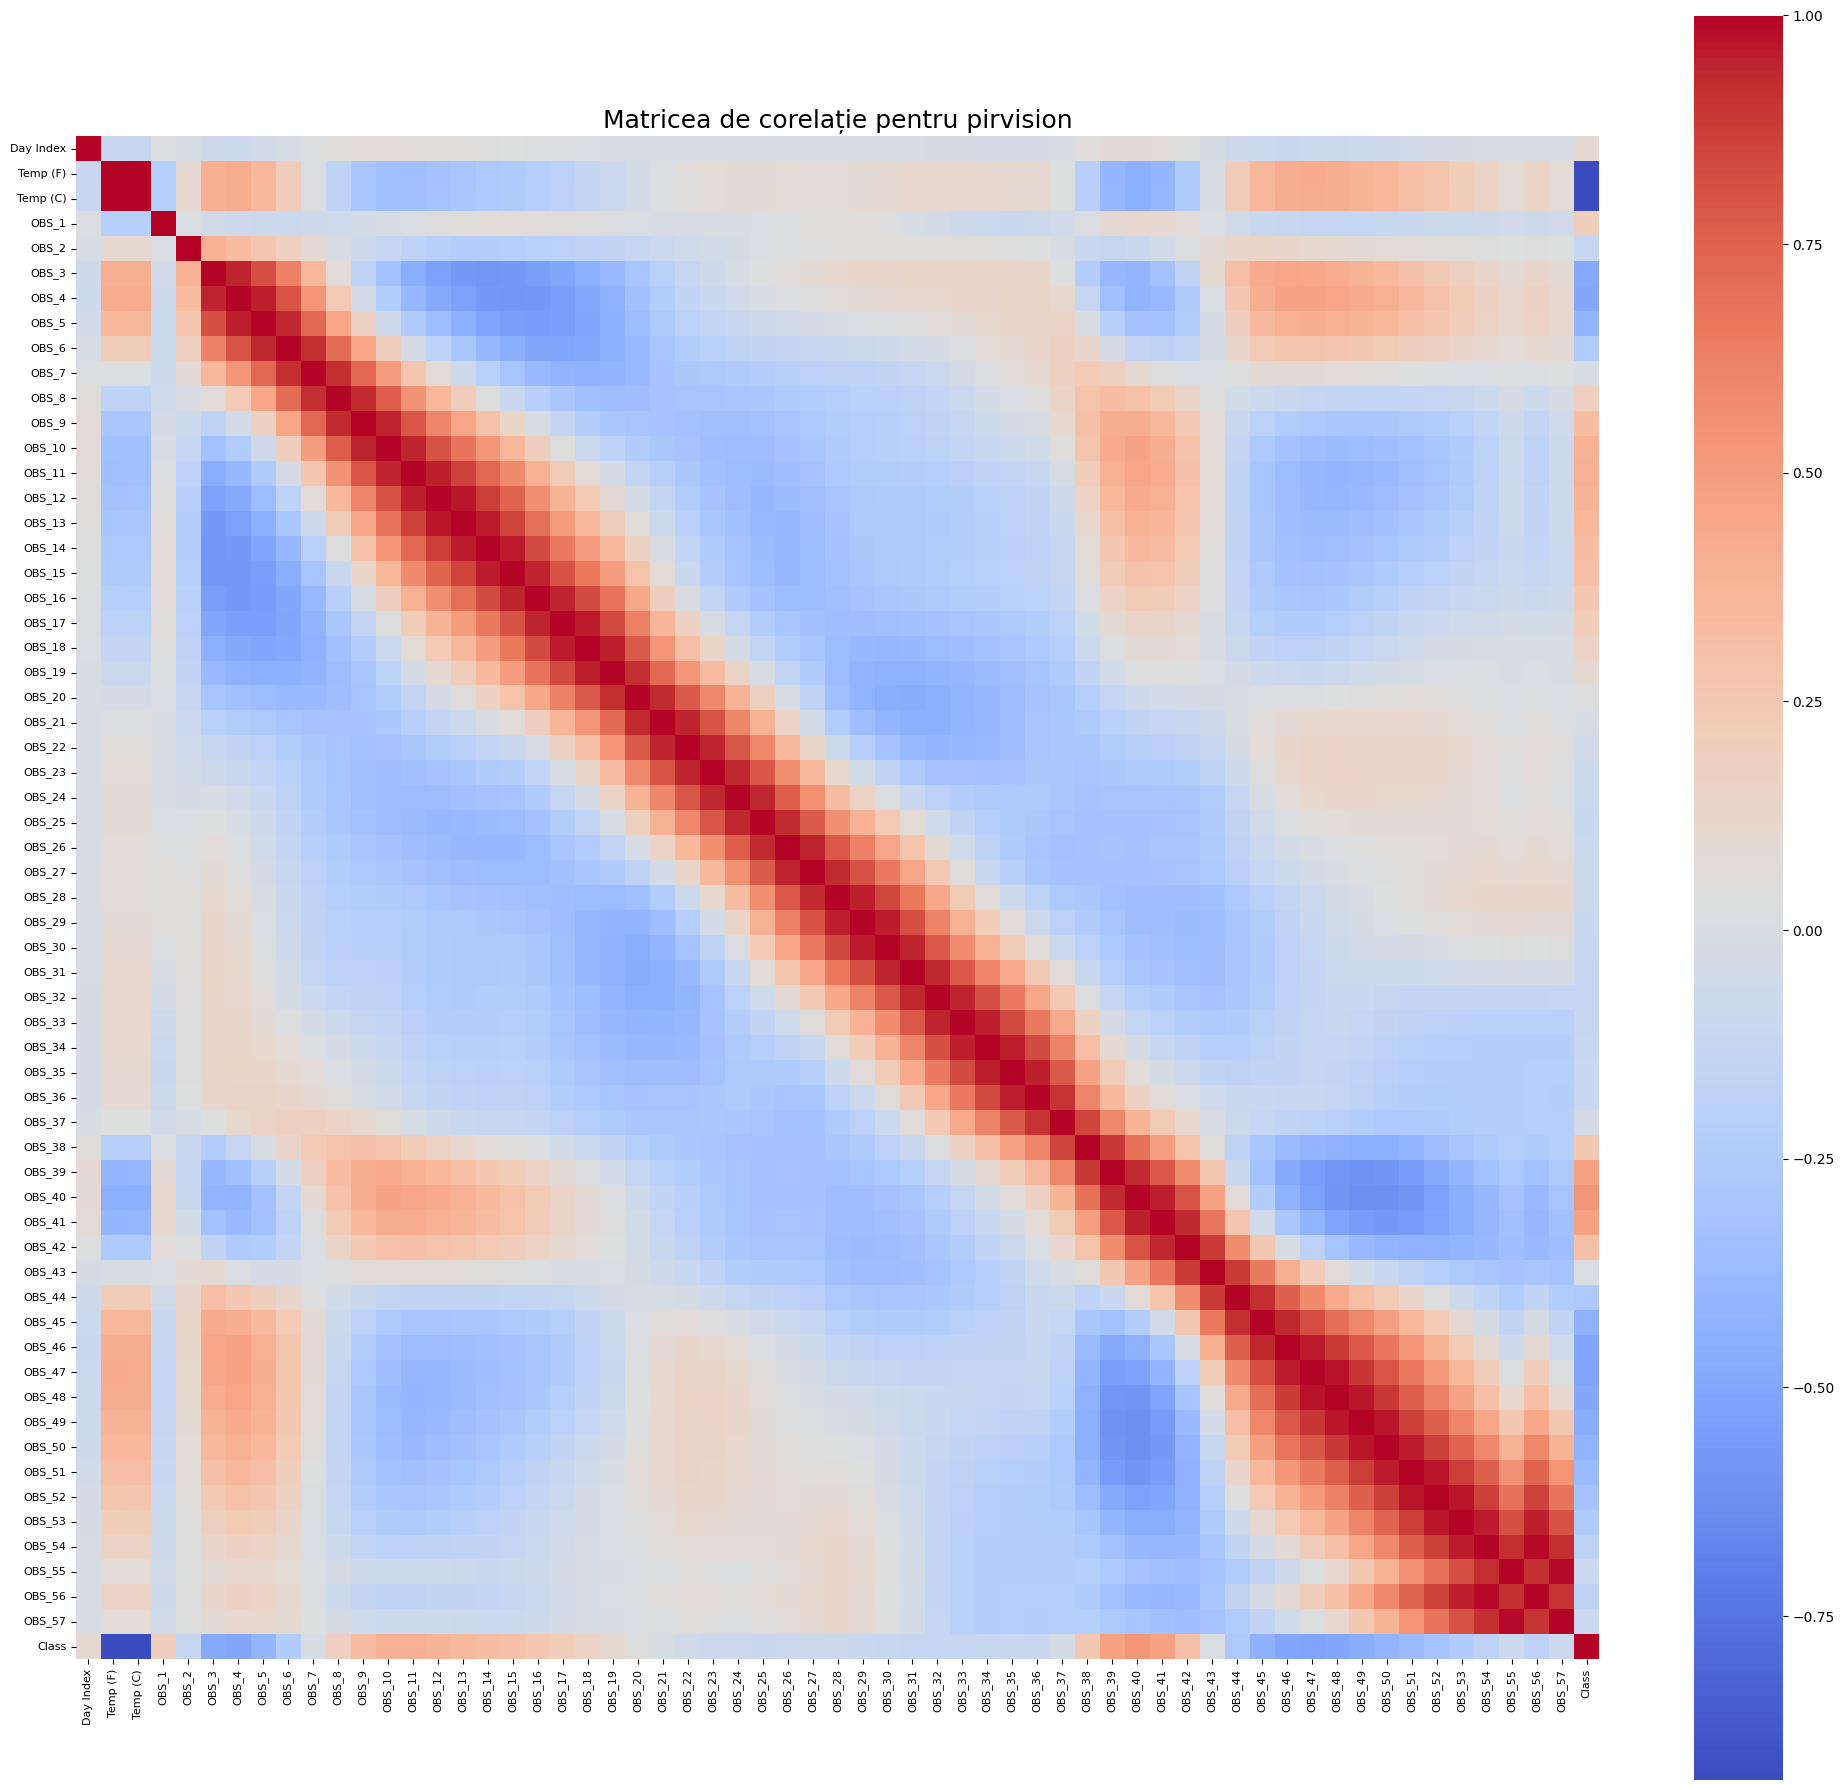

In [13]:
cor_matrix = pirvision_numerical.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(cor_matrix, cmap='coolwarm', square=True)
plt.title("Matricea de corelație pentru pirvision", fontsize=18)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

#  Preprocesarea datelor

## 2. Valori extreme pentru un atribut într-un eșantion 

In [14]:
import numpy as np

# Heart
Q1 = heart_df[heart_continuous_columns].quantile(0.25)
Q3 = heart_df[heart_continuous_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((heart_df[heart_continuous_columns] < (Q1 - 1.5 * IQR)) | (heart_df[heart_continuous_columns] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

for col in heart_continuous_columns:
    q1 = heart_df[col].quantile(0.25)
    q3 = heart_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    heart_df[col] = heart_df[col].mask((heart_df[col] < lower_bound) | (heart_df[col] > upper_bound), np.nan)

print()

# Pirvision
Q1 = pirvision_df[pirvision_continuous_columns].quantile(0.25)
Q3 = pirvision_df[pirvision_continuous_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((pirvision_df[pirvision_continuous_columns] < (Q1 - 1.5 * IQR)) | (pirvision_df[pirvision_continuous_columns] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

for col in pirvision_continuous_columns:
    q1 = pirvision_df[col].quantile(0.25)
    q3 = pirvision_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    pirvision_df[col] = pirvision_df[col].mask((pirvision_df[col] < lower_bound) | (pirvision_df[col] > upper_bound), np.nan)

cholesterol_level      60
systolic_pressure     126
daily_cigarettes       12
diastolic_pressure     77
heart_rate             76
mass_index             97
blood_sugar_level     203
age                   128
sleep_heart_rate       64
ldl_cholesterol        51
dtype: int64

Temp (F)    746
Temp (C)    746
OBS_1       430
OBS_2       547
OBS_3       315
OBS_4       340
OBS_5       322
OBS_6       312
OBS_7       351
OBS_8       323
OBS_9       307
OBS_10      293
OBS_11      277
OBS_12      284
OBS_13      277
OBS_14      302
OBS_15      314
OBS_16      333
OBS_17      362
OBS_18      419
OBS_19      436
OBS_20      450
OBS_21      462
OBS_22      449
OBS_23      440
OBS_24      433
OBS_25      418
OBS_26      428
OBS_27      412
OBS_28      409
OBS_29      426
OBS_30      458
OBS_31      438
OBS_32      442
OBS_33      451
OBS_34      444
OBS_35      451
OBS_36      433
OBS_37      456
OBS_38      252
OBS_39      278
OBS_40      324
OBS_41      308
OBS_42      283
OBS_43      237
OBS_44

## 1. Date lipsă pentru un atribut într-un eșantion

In [15]:
from sklearn.impute import SimpleImputer

# Heart
continuous_imputer = SimpleImputer(strategy='median')
heart_df[heart_continuous_columns] = continuous_imputer.fit_transform(heart_df[heart_continuous_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
heart_df[heart_categorical_columns] = categorical_imputer.fit_transform(heart_df[heart_categorical_columns])

# Pirvision
pirvision_df[pirvision_continuous_columns] = continuous_imputer.fit_transform(pirvision_df[pirvision_continuous_columns])
pirvision_df[pirvision_categorical_columns] = categorical_imputer.fit_transform(pirvision_df[pirvision_categorical_columns])

## 3. Atribute redundante (puternic corelate)

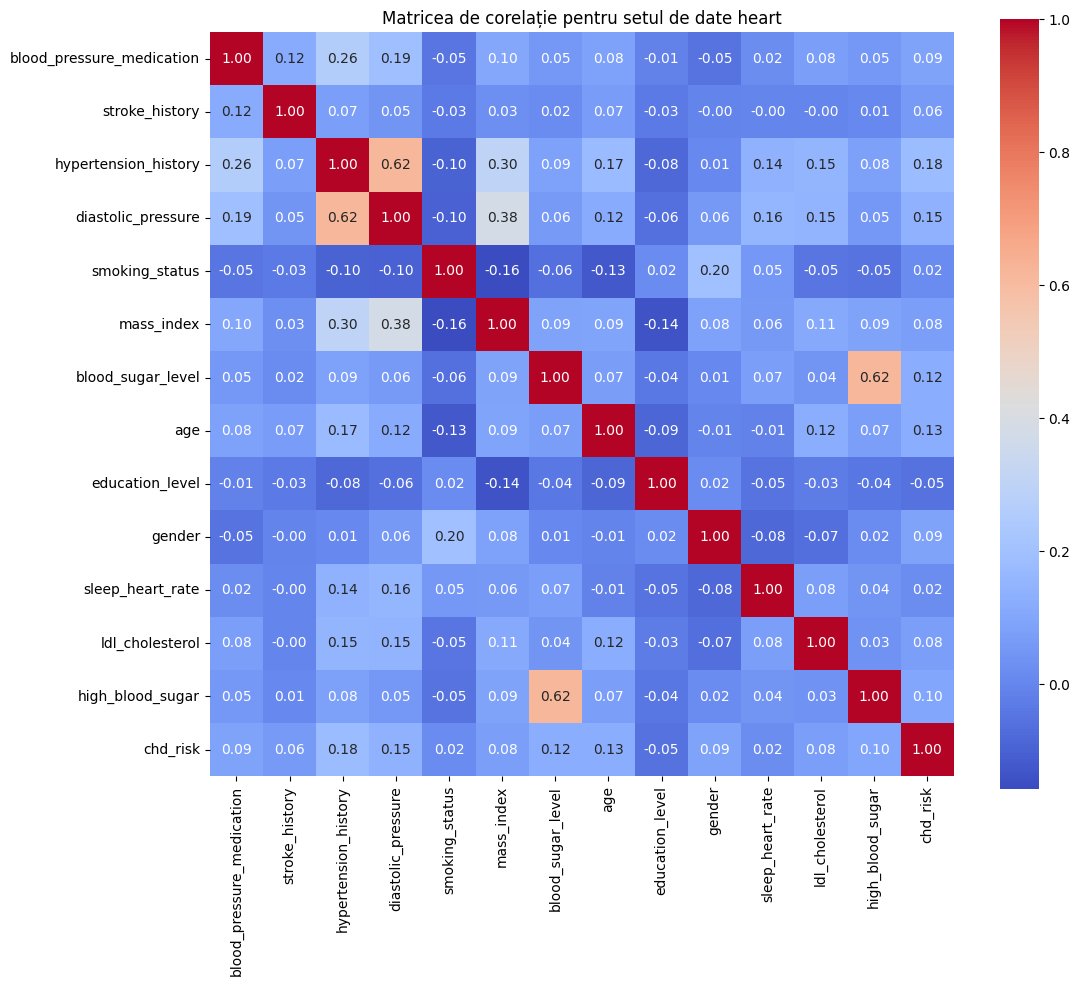

In [16]:
# Drop strongly correlated variables
heart_columns_drop = ['cholesterol_level', 'systolic_pressure', 'daily_cigarettes', 'heart_rate', 'diabetes_history']
heart_df = heart_df.drop(columns=heart_columns_drop)

# Display new correlation matrix
heart_numerical = heart_numerical.drop(columns=heart_columns_drop, errors='ignore')
cor_matrix = heart_numerical.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matricea de corelație pentru setul de date heart")
plt.show()

###  Explicații:

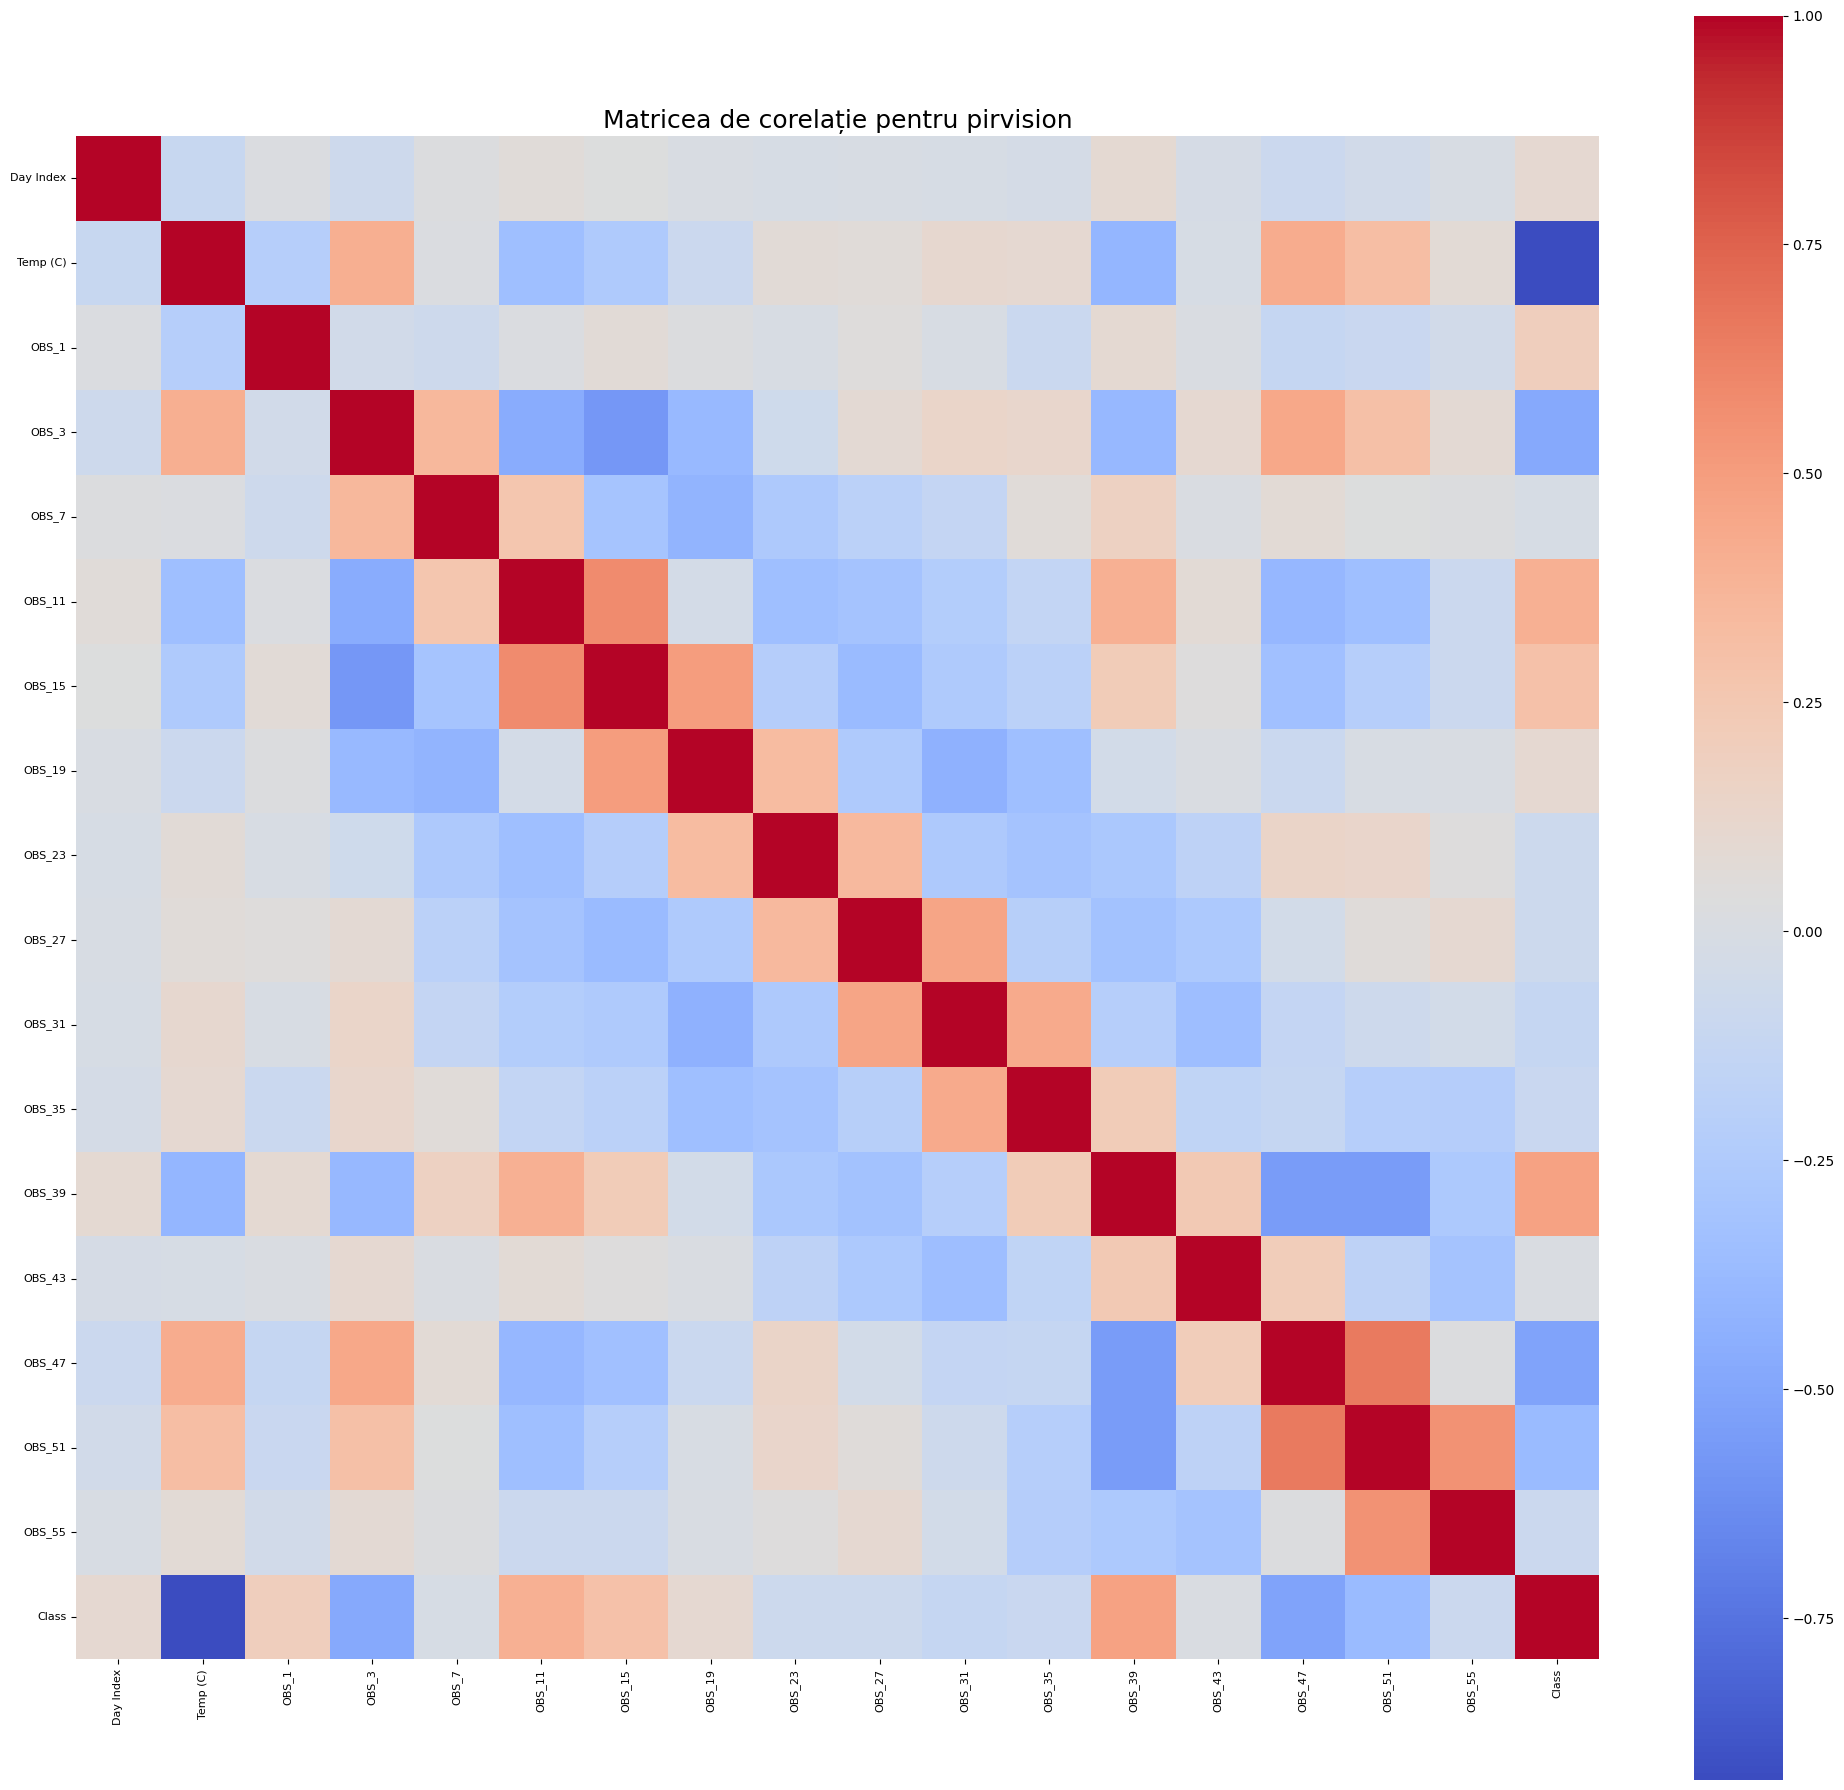

In [17]:
# Drop strongly correlated variables
pirvision_columns_drop = ['Temp (F)'] + ['OBS_' + str(i) for i in range(2, 57, 2)] + ['OBS_' + str(i) for i in range(5, 58, 4)] 
pirvision_df = pirvision_df.drop(columns=pirvision_columns_drop)

# Display new correlation matrix
pirvision_numerical = pirvision_numerical.drop(columns=pirvision_columns_drop, errors='ignore')
cor_matrix = pirvision_numerical.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(cor_matrix, cmap='coolwarm', square=True)
plt.title("Matricea de corelație pentru pirvision", fontsize=18)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

### Explicatii:

## 4. Plaje valorice de mărimi diferite pentru atributele numerice

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

heart_continuous_scaled = scaler.fit_transform(heart_continuous_df)
heart_continuous_scaled_df = pd.DataFrame(heart_continuous_scaled, columns=heart_continuous_df.columns, index=heart_continuous_df.index)
heart_df[heart_continuous_df.columns] = heart_continuous_scaled_df

print(heart_df.describe())

       blood_pressure_medication  stroke_history  hypertension_history  \
count                4240.000000     4240.000000           4240.000000   
mean                    0.029245        0.005896              0.310613   
std                     0.168513        0.076569              0.462799   
min                     0.000000        0.000000              0.000000   
25%                     0.000000        0.000000              0.000000   
50%                     0.000000        0.000000              0.000000   
75%                     0.000000        0.000000              1.000000   
max                     1.000000        1.000000              1.000000   

       diastolic_pressure  smoking_status    mass_index  blood_sugar_level  \
count        4.240000e+03     4240.000000  4.222000e+03       3.919000e+03   
mean         6.703233e-18        0.546462  5.048859e-17      -2.864653e-16   
std          1.000118e+00        0.497895  1.000118e+00       1.000128e+00   
min         -2.930371

In [21]:
valid_cols = [col for col in pirvision_continuous_columns if col in pirvision_df.columns]
pirvision_continuous_df = pirvision_df[valid_cols]

pirvision_continuous_scaled = scaler.fit_transform(pirvision_continuous_df)
pirvision_continuous_scaled_df = pd.DataFrame(pirvision_continuous_scaled, columns=pirvision_continuous_df.columns, index=pirvision_continuous_df.index)
pirvision_df[pirvision_continuous_df.columns] = pirvision_continuous_scaled_df

print(pirvision_df.describe(include='all'))

       Timestamp  Day Index         Day      Temp (C)         OBS_1  \
count      10000    10000.0       10000  1.000000e+04  1.000000e+04   
unique      5502        3.0           3           NaN           NaN   
top     00:02:58        2.0  2024-09-08           NaN           NaN   
freq        1004     7251.0        7532           NaN           NaN   
mean         NaN        NaN         NaN  3.588241e-17 -2.149392e-17   
std          NaN        NaN         NaN  1.000050e+00  1.000050e+00   
min          NaN        NaN         NaN -1.933038e+00 -3.082765e+00   
25%          NaN        NaN         NaN -3.284577e-01 -6.384003e-01   
50%          NaN        NaN         NaN -3.284577e-01 -1.237972e-01   
75%          NaN        NaN         NaN  1.276123e+00  5.262277e-01   
max          NaN        NaN         NaN  1.276123e+00  3.106014e+00   

               OBS_3         OBS_7        OBS_11        OBS_15        OBS_19  \
count   1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.0

# Utilizarea algoritmilor de Învățare Automată 